# Alyssa

## Research question/interests

**What is the relationship between the active participation of music in one's lifestyle (composing, playing an instrument, or neither) in relation to the frequency of anxiety and depression among these individuals?**
 
I plan on answering my first research question using the columns: instrumentalist, composer, anxiety and depression. I may visualize this data using a scatterplot based on categories of composing, playing an instrument or neither in relation to anxiety or depression and the scale of anxiety or depression on the y axis.  <br><br>

**Analysis plan:**
For my analysis, I will incorporate the columns: instrumentalist, composer, neither, anxiety, and depression into a data frame. I will clean my data by checking for any missing values and if there are any incorrect data that is beyond the range of interest. If there are any outliers, I will indicate as such and deal with these appropriately. I plan on adding an additional column "neither" to count the number of those who are not composing or playing an instrument by doing groupBy. I may also add an overall mental health analysis in the form of a percentage by doing some further data manipulation. Finally, I will visualize said data in the most appropriate manner after a few different experimentations.

<br>

**What is the correlation between an instrument player, a composer, or neither and how they percieve the effect of music on their lives?**

For my second research question, I plan on using the columns: instrumentalist, composer, and music effects. <br><br>
**Analysis plan:**
I will incorporate the columns: instrumentalist, composer, and music effects into a data frame. Once again, I will create a new aggregate column of those who are neither an instrumentalist or a composer. I will have to remove any of the NaN values of music effects and check any of the other columns for incorrect or missing data. I will also plan on dealing with any outliers and noting this as well. I will count the total number of those who have felt that music has had an improvement and compare it between those who are a composer, instrumentalist or neither. After this processing, I will find a suitable method for visualizing the data.




In [ ]:
#import 
import pandas as pd
import seaborn as sns
#creating dataFrame
dataset = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')

dataset.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## EDA

In [ ]:
# Determining all the names of the columns in the dataset

pd.DataFrame(dataset.columns)

,0
0,Timestamp
1,Age
2,Primary streaming service
3,Hours per day
4,While working
5,Instrumentalist
6,Composer
7,Fav genre
8,Exploratory
9,Foreign languages


In [ ]:
# Figuring out the total rows and columns of the dataset (rows, columns)

dataset.shape

(736, 33)

In [ ]:
# Since I am more interested in the columns: instrumentalist, composer, anxiety, depression, insomnia, OCD, and music effects, I'm going to produce a new dataframe with these columns

In [ ]:
df=dataset[['Instrumentalist', 'Composer', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']]
df

,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
0,Yes,Yes,3.0,0.0,1.0,0.0,NaN
1,No,No,7.0,2.0,2.0,1.0,NaN
2,No,No,7.0,7.0,10.0,2.0,No effect
3,No,Yes,9.0,7.0,3.0,3.0,Improve
4,No,No,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...
731,Yes,No,7.0,6.0,0.0,9.0,Improve
732,Yes,No,3.0,2.0,2.0,5.0,Improve
733,No,Yes,2.0,2.0,2.0,2.0,Improve
734,Yes,No,2.0,3.0,2.0,1.0,Improve


In [ ]:
# Looking at the possible values of music effects

df['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [ ]:
#looking at how many NaN values are in column 'Music effects'

df['Music effects'].isna().sum()

8

In [ ]:
# Dropping rows that have NaN values to ensure that this does not interfere with the results
df=df.dropna()

In [ ]:
# Examining how many instrumentalists are in this dataset

(df['Instrumentalist']=='Yes').sum()

232

In [ ]:
# Examining how many composers are in this dataset
(df['Composer']=='Yes').sum()

124

In [ ]:
# Looking at the possible values of Instrumentalist

df['Instrumentalist'].unique()


array(['No', 'Yes'], dtype=object)

In [ ]:
# Looking at the possible values of composer

df['Composer'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:

# Looking at the highest and lowest values of Anxiety, depression, insomnia, OCD

pd.DataFrame([{"Anxiety":df['Anxiety'].min(),  "Depression":df['Depression'].min(),  "Insomnia":df['Insomnia'].min(), "OCD":df['OCD'].min()},{ "Anxiety":df['Anxiety'].max(), "Depression":df['Depression'].max(),  "Insomnia":df['Insomnia'].max(),  "OCD":df['OCD'].max()}])



,Anxiety,Depression,Insomnia,OCD
0,0.0,0.0,0.0,0.0
1,10.0,10.0,10.0,10.0


In [ ]:
#examining the means, counts and other values of the numeric categories
df.describe()

,Anxiety,Depression,Insomnia,OCD
count,725.000000,725.000000,725.000000,725.000000
mean,5.848966,4.804138,3.745517,2.649655
std,2.789758,3.022861,3.095465,2.849230
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,5.000000
max,10.000000,10.000000,10.000000,10.000000


<seaborn.axisgrid.FacetGrid>

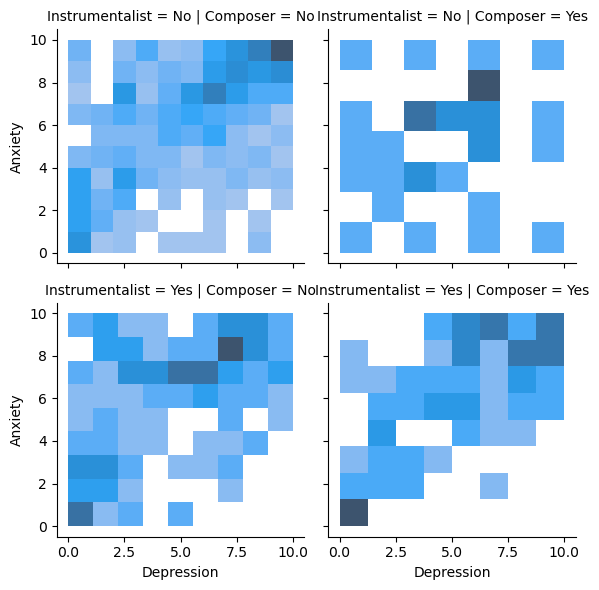

In [ ]:
# visualizing scatterplot of composers and instrumentalists related to their anxiety and depression, 0 being none and 10 being extreme
g= sns.FacetGrid(df, col="Composer", row="Instrumentalist")
g.map(sns.histplot, "Depression", "Anxiety")


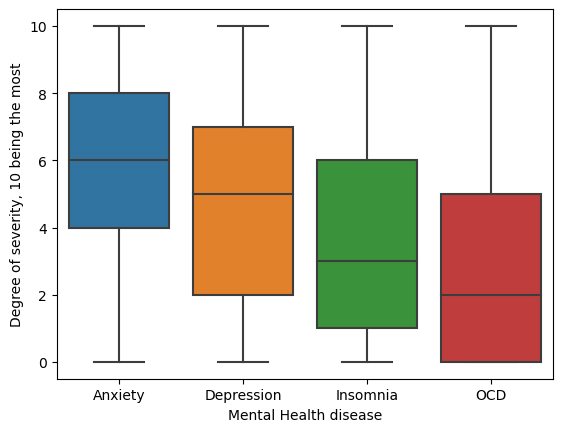

In [ ]:
# visualizing the distribution of different mental health diseases
ax1=sns.boxplot(data=df).set(xlabel="Mental Health disease",ylabel="Degree of severity, 10 being the most")



(0.0, 100.0)

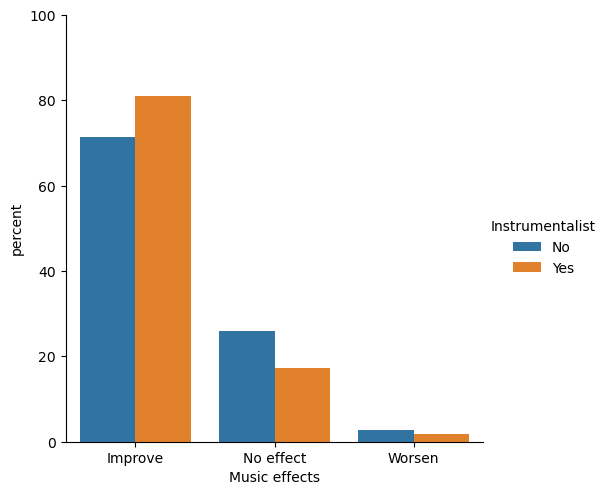

In [ ]:
# Seeing the music effects for instrumentalists -- determining the distribution of improvement, no effect, or worsening effect among instrumentalists vs noninstrumentalists
df1 = df.groupby('Instrumentalist')['Music effects'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x='Music effects',y='percent',hue='Instrumentalist',kind='bar',data=df1)
g.ax.set_ylim(0,100)



<AxesSubplot:xlabel='count', ylabel='Music effects'>

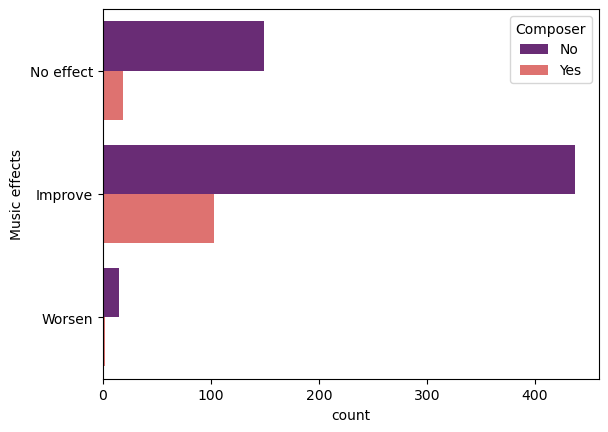

In [ ]:
sns.countplot(data=df, y='Music effects', hue='Composer', palette="magma")

